#### Aluno: Victor Vilanova Bandeira EMAP-FGV

# Inferência Causal

Inferir uma causa pode ser descrito como:

    "Identificação da causa ou causas de um fenômeno, estabelecendo uma correlação entre causa e efeito, uma relação de ordem temporal com a causa que precede o efeito e a eliminação de causas alternativamente plausíveis"
    
   Dessa forma, a infeência causal é o estudo de sistemas em que se suspeita quando a medida de uma variável afeta a medida de outra. Uma das suas aplicações mais importantes é para conduzir o método científico. Todavia, no meio do ambiente científico temos muito mal entendidos, principalmente para leigos, quando se trata de estudos científicos. Dessa forma, muitas pessoas se equivocam quando esquecem que correlação não implica causalidade necessariamente.

Assim, podemos visualizar as causalidades com os DAGs (Directed Acyclic Graphs). Temos na literatuda 4 esquemas elementais principais.

In [1]:
from IPython.display import Image
Image("dags.png",width = 550)

Exemplificando:

   Olhando o DAG conhecido como "The Pipe" (O cano). 
   
       A variável X causa a variável Z, que por sua vez causa a variável Y. 
       E a variável X é independente de Y condicionado em Z.
       
   The Pipe, em um mundo real, pode ser visualizado como: 
          
          X -> Tratamento de uma droga
          Y -> Consequência do tratamento
          Z -> Resultado
              

 Sendo assim, realizaremos um simulação estatística que demonstrará a validação de um DAG, a importância de olharmos DAG de experimentos e procurarmos encontrar a causalidade dos eventos _ principalmente, quando tratamos do meio científico.

# Simulação de um experimento de DAG de colisão

 Do experimento:
 
   O Experimento consiste em simular um pensamento empírico em que quanto mais anos uma pessoa têm e quanto mais feliz é essa pessoa maior é sua probabilidade de casar. No entanto, será que uma maior idade torna uma pessoa mais feliz ou mais triste?
    
   Nesse contexto, realizaremos uma simulação de uma população por 1000 anos.
    Iremos assumir:
    
       - 20 pessoas nascem a cada ano.
       - cada nascimento a pessoa ganha uma felicidade uniform que nunca muda.
       - quando chega a 18 anos se torna elegível a casar. A probabilidade de casar em cada ano é proporcional a felicidade.
       - pessoas casada permanecem casadas até a morte.
       - quando chega a 65 anos são retiradas da população.


### DAG

In [2]:
from IPython.display import Image
Image("Diagrama.png",width = 350)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
class Pessoa():
    def __init__(self):
        self.idade = 0
        self.felicidade = np.random.uniform(0,4)
        self.casada = 0
        
    def ver_se_casou(self):
        if self.idade > 17:
            if self.casada == 1:
                pass
            else:
                prob = self.felicidade/37
                if np.random.random() < prob:
                    self.casada = 1
                
    

In [5]:
populacao = []

N_anos = 1000
N_nascimento = 20
N_morte = 65

for i in range(N_anos):
    #populacao mais velha
    for i in populacao:
        i.idade += 1
    
    #nascimentos
    for i in range(N_nascimento):
        populacao.append(Pessoa())
        
        
    #checa se morreu
    morreu=[]
    for i in populacao:
        if i.idade > N_morte:
            morreu.append(i)
    for i in morreu:
        populacao.remove(i)
        
    #checa se casou
    for i in populacao:
        i.ver_se_casou()


idades = []
felicidades = []
casada = []
for i in populacao:
    idades.append(i.idade)
    felicidades.append(i.felicidade)
    casada.append(i.casada)
    

In [6]:
data = pd.DataFrame(list(zip(idades,felicidades,casada)), columns=["idades","felicidade","casada"])

In [7]:
print(f'A média de felcidade de pessoas casadas é: {data["felicidade"][data.casada == 1].mean()} e a média de felicidade de pessoas não casadas é {data["felicidade"][data.casada == 0].mean()}')

A média de felcidade de pessoas casadas é: 2.426690372176895 e a média de felicidade de pessoas não casadas é 1.6899304617014501


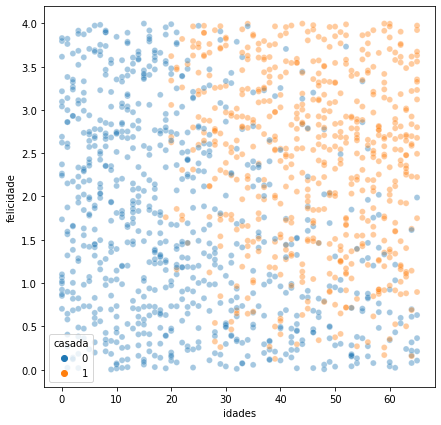

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=data["idades"], y=data["felicidade"], hue=data["casada"], alpha=0.4, ax=ax)
plt.show()
plt.close('all')

Portanto, após a simulação, podemos fazer duas regressões de idade por felicidade separando por classe em casada ou não casada. Assim, poderemos ver se há alguma correlação entre a idade e a felicidade.

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression


filtro_casados = data["casada"] == 1
filtro_ncasados = data["casada"] == 0

reg_casados = LinearRegression().fit(np.array(data["idades"][filtro_casados]).reshape(-1, 1),data["felicidade"][filtro_casados])
reg_ncasados = LinearRegression().fit(np.array(data["idades"][filtro_ncasados]).reshape(-1, 1),data["felicidade"][filtro_ncasados])

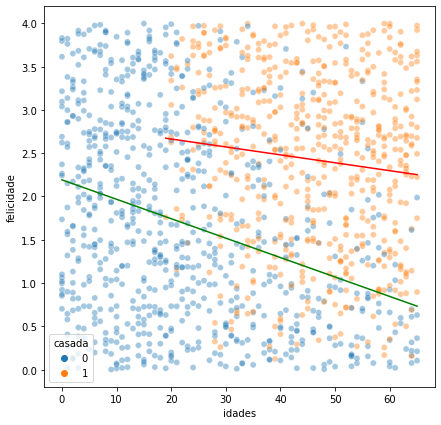

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=data["idades"], y=data["felicidade"], hue=data["casada"], alpha=0.4, ax=ax)
plt.plot(np.array(data["idades"][filtro_casados]).reshape(-1,1),reg_casados.predict(np.array(data["idades"][filtro_casados]).reshape(-1,1)),color='red',label="reg. ")
plt.plot(np.array(data["idades"][filtro_ncasados]).reshape(-1,1),reg_ncasados.predict(np.array(data["idades"][filtro_ncasados]).reshape(-1,1)),color='green')
plt.show()
ax.legend()
plt.close('all')


Agora, vendo as regressões é possível ver que a uma correlação negativa entre as variáveis. Haja visto que, na idade 50 a felicidade é um pouco maior que 1 para a regressão de não casados e aprox. 2.5 para os casados, entretanto, a distribuição da felicidade é a mesma para todas as pessoas.

Olhando novamente o diagrama:

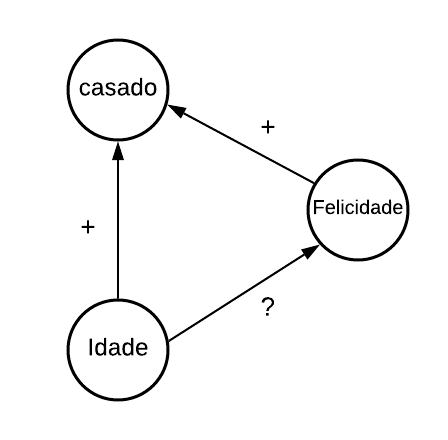

In [11]:
from IPython.display import Image
Image("Diagrama.png",width = 350)

Sendo assim, podemos ver que a linha (?) não existe. Entretanto, na vida real não sabemos, precisariamos enriquecer esses cenários com informações externas para apresentar argumentos causais persuasivos sobre esses efeitos.